### Extract colors from css from the theme guzzle

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
#css_file_name = "/anaconda3/lib/python3.7/site-packages/guzzle_sphinx_theme/guzzle_sphinx_theme/static/css/bootstrap.min.css"
css_file_name = "/anaconda3/lib/python3.7/site-packages/guzzle_sphinx_theme/guzzle_sphinx_theme/static/css/bootstrap-theme.min.css"

In [3]:
file_content=[]
for line in open(css_file_name):
    file_content.append(line.rstrip("\n"))

In [4]:
print(len(file_content))

7


In [5]:
text_to_parse = file_content[6]

In [6]:
colors = []
n_of_colors = 0

for i in range (0, len(text_to_parse)): 
    
    # if find a color (starting with #)
    if text_to_parse[i] == "#":
        
        # take the string until the next space
        string_after_current_i = text_to_parse[i:-1]
        space_index = string_after_current_i.find(" ")
        color = text_to_parse[i : i+space_index]
#         print (color)
        
        # delete what comes after '
        if "'" in color:
            color = color[0: color.find("'")]
        
        # delete what comes after ;
        if ";" in color:
            color = color[0: color.find(";")]
            
        # delete what comes after .
        if "}" in color:
            color = color[0: color.find("}")]
            
        # delete what comes after ]
        if "]" in color:
            color = color[0: color.find("")]
    
        # if longer than 7 digis, stop at 7
        if len(color) > 7:
            color = color[0:6]
            
        # if 6 digits, add a 0 in second last position
        if len(color) == 6:
            temp = color [0:5]
            temp = temp + "0"
            temp = temp + color [5]
            color = temp
        
        
        # avoid duplicates
        if color not in colors and color != "#iefi0x" and color != "#glyp0h":
            colors.append(color)
            n_of_colors = n_of_colors + 1
        
#         print (color)
#         print (" ")
        
        
        
print (n_of_colors)
print (colors)

90
['#fff', '#e0e0e0', '#ffff0f', '#ffe00e', '#dbdbdb', '#ccc', '#428bca', '#2d6ca2', '#ff4208', '#ff2d06', '#2b669a', '#5cb85c', '#419641', '#ff5c0b', '#ff4109', '#3e8f3e', '#5bc0de', '#2aabd2', '#ff5b0c', '#ff2a0a', '#28a4c9', '#f0ad4e', '#eb9316', '#fff00a', '#ffeb09', '#e38d13', '#d9534f', '#c12e2a', '#ffd905', '#ffc102', '#b92c28', '#f5f5f5', '#e8e8e8', '#fff50f', '#ffe80e', '#357ebd', '#ff3507', '#f8f8f8', '#fff80f', '#ebebeb', '#f3f3f3', '#ffeb0e', '#fff30f', '#3c3c3c', '#222', '#ff3c03', '#ff2202', '#282828', '#ff2802', '#dff0d8', '#c8e5bc', '#ffdf0f', '#ffc80e', '#b2dba1', '#d9edf7', '#b9def0', '#ffd90e', '#ffb90d', '#9acfea', '#fcf8e3', '#f8efc0', '#fffc0f', '#fff80e', '#f5e79e', '#f2dede', '#e7c3c3', '#fff20d', '#ffe70c', '#dca7a7', '#3071a9', '#ff3007', '#449d44', '#ff4409', '#31b0d5', '#ff310b', '#ec971f', '#ffec09', '#c9302c', '#ffc903', '#3278b3', '#ff3207', '#d0e9c6', '#ffd00e', '#c4e3f3', '#ffc40e', '#faf2cc', '#fffa0f', '#ebcccc', '#ffeb0c', '#dcdcdc']


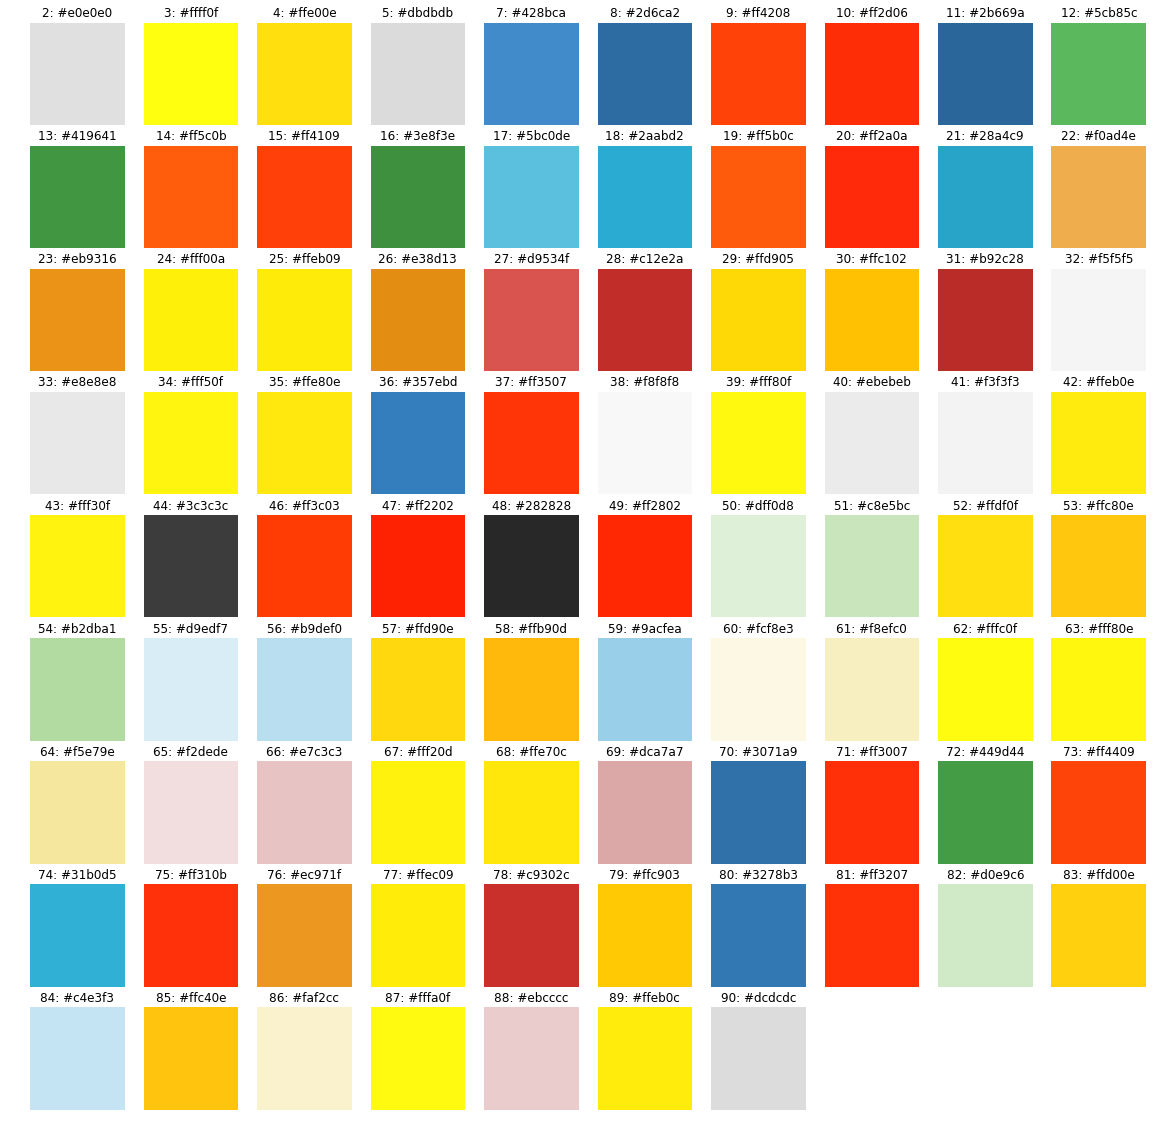

3 non plotted colors:
['#fff', '#ccc', '#222']


In [7]:
nOfImages   = n_of_colors
figure_width = 20
fig_length   = 20
plt.rcParams['figure.figsize'] = [figure_width, fig_length] # figsize=() seems to be ineffective on notebooks
fig     = plt.figure() # cannot call figures inside the for loop because python has a max of 20 figures (nOfImages can be larger)
fig.tight_layout() # avoids subplots overlap

non_plot_colors = []

# subplots characteristics
n_of_columns = 10
n_of_rows    = n_of_colors // n_of_columns
axis_index = 1;

for i in range(0, n_of_colors):
    
    if len(colors[i]) == 7:
        
        # create subplot
        ax = fig.add_subplot(n_of_rows,n_of_columns,axis_index)
        # create rectangle
        ax.add_patch(Rectangle(xy=(0, 0), width=1, height=1,
                              alpha=1, facecolor=colors[i]))
        ax.axis("off")
        ax.set_title(str(i+1) + ": " + str(colors[i]))
        
        axis_index = axis_index + 1
    
    else:
        
        non_plot_colors.append(colors[i])
        
        
        
        
plt.show()

print (str(len(non_plot_colors)) + " non plotted colors:")
print (non_plot_colors)

        

In [8]:
current_color = colors[6]
current_color = current_color.lstrip('#')
print (current_color)
#print('RGB =', tuple(int(current_color[i:i+2], 16) for i in (0, 2, 4)))
hlen = len(current_color)

#return tuple(int(hex[i:i+hlen/3], 16) for i in range(0, hlen, hlen/3))
print(tuple(int(current_color[i:i+hlen//3], 16) for i in range(0, hlen, hlen//3))) # // returns an integer

428bca
(66, 139, 202)


In [9]:
type(color)

str

In [10]:
color = '#ff428'
print (color)
temp = color [0:5]
temp = temp + "0"
temp = temp + color [5]
color = temp
print (color)
#color.replace(color[-1],"0")
#color = color + color[6]
#color[5] = "0"
# print (temp)
# print (color)
# print ("")

#ff428
#ff4208
